In [78]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [79]:
df = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')

df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


In [80]:
df.columns = ['city', 'population', 'violent', 'murder', 'rape1', 'rape2', 'robbery', 
              'ag_aslt', 'property', 'burglary', 'larce-th', 'motor_th', 'arson3']

df.head()

,city,population,violent,murder,rape1,rape2,robbery,ag_aslt,property,burglary,larce-th,motor_th,arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


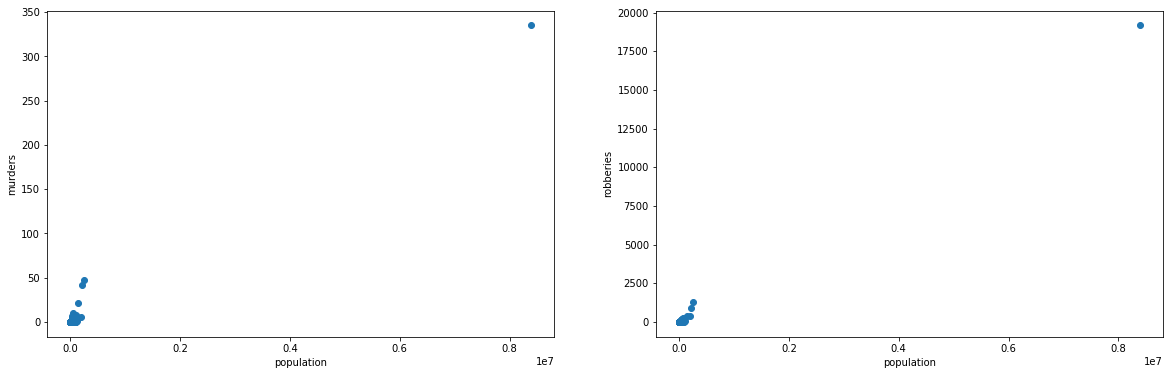

In [81]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.scatter(x='population', y='murder', data=df)
plt.xlabel('population')
plt.ylabel('murders')
plt.subplot(1,2,2)
plt.scatter(x='population', y='robbery', data=df)
plt.xlabel('population')
plt.ylabel('robberies')
plt.show()

In [82]:
df.sort_values('population', ascending=False).head()

,city,population,violent,murder,rape1,rape2,robbery,ag_aslt,property,burglary,larce-th,motor_th,arson3
216,New York,8396126.000,52384.000,335.000,nan,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,nan
35,Buffalo,258789.000,3249.000,47.000,nan,145.000,1322.000,1735.000,12491.000,3458.000,8076.000,957.000,nan
272,Rochester,210562.000,2107.000,42.000,nan,92.000,918.000,1055.000,10051.000,2587.000,6855.000,609.000,132.000
346,Yonkers,199134.000,1036.000,6.000,nan,25.000,390.000,615.000,2368.000,470.000,1662.000,236.000,10.000
310,Syracuse,143834.000,1192.000,21.000,nan,75.000,400.000,696.000,6473.000,1781.000,4298.000,394.000,57.000


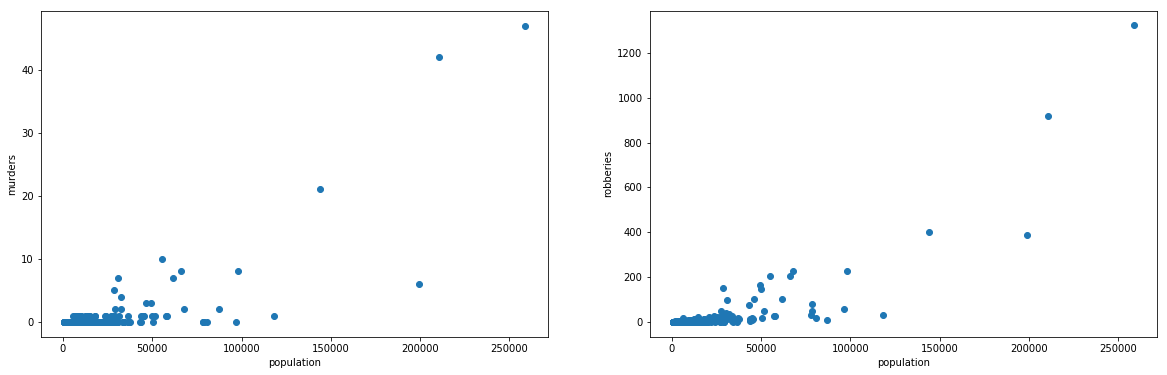

In [83]:
df = df.drop(216)

plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.scatter(x='population', y='murder', data=df)
plt.xlabel('population')
plt.ylabel('murders')
plt.subplot(1,2,2)
plt.scatter(x='population', y='robbery', data=df)
plt.xlabel('population')
plt.ylabel('robberies')
plt.show()

In [88]:
df.columns

Index(['city', 'population', 'violent', 'murder', 'rape1', 'rape2', 'robbery',
       'ag_aslt', 'property', 'burglary', 'larce-th', 'motor_th', 'arson3'],
      dtype='object')

In [89]:
df2 = df[['population','murder','robbery']]

df2['population^2'] = df2['population'] * df2['population']

df2.loc[df2['murder']>0, 'murder'] = 1

df2.loc[df2['robbery']>0, 'robbery'] = 1

df2.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,population,murder,robbery,population^2
0,1861.000,0.000,0.000,3463321.000
1,2577.000,0.000,0.000,6640929.000
2,2846.000,0.000,0.000,8099716.000
3,97956.000,1.000,1.000,9595377936.000
4,6388.000,0.000,1.000,40806544.000
